In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#1. call the model model= DecisionTree()
#2. fitting model.fit(max_depth=)
#3. prediction model.predict()
#4. metrics score

In [ ]:
!pip install statsmodels

In [ ]:
df= pd.read_csv('/content/AAPL.csv')
# df_meta = pd.read_csv('/content/META.csv')
# df_netflix=pd.read_csv('/content/NFLX.csv')
# df_goog=pd.read_csv('/content/GOOG.csv')
# df_amzn=pd.read_csv('/content/AMZN.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890549,51511700
1,2023-04-06,162.429993,164.960007,162.000000,164.660004,163.785767,45390100
2,2023-04-10,161.419998,162.029999,160.080002,162.029999,161.169708,47716900
3,2023-04-11,162.350006,162.360001,160.509995,160.800003,159.946259,47644200
4,2023-04-12,161.220001,162.059998,159.779999,160.100006,159.249985,50133100
...,...,...,...,...,...,...,...
246,2024-03-28,171.750000,172.229996,170.509995,171.479996,171.479996,65672700
247,2024-04-01,171.190002,171.250000,169.479996,170.029999,170.029999,46240500
248,2024-04-02,169.080002,169.339996,168.229996,168.839996,168.839996,49329500
249,2024-04-03,168.789993,170.679993,168.580002,169.649994,169.649994,47602100


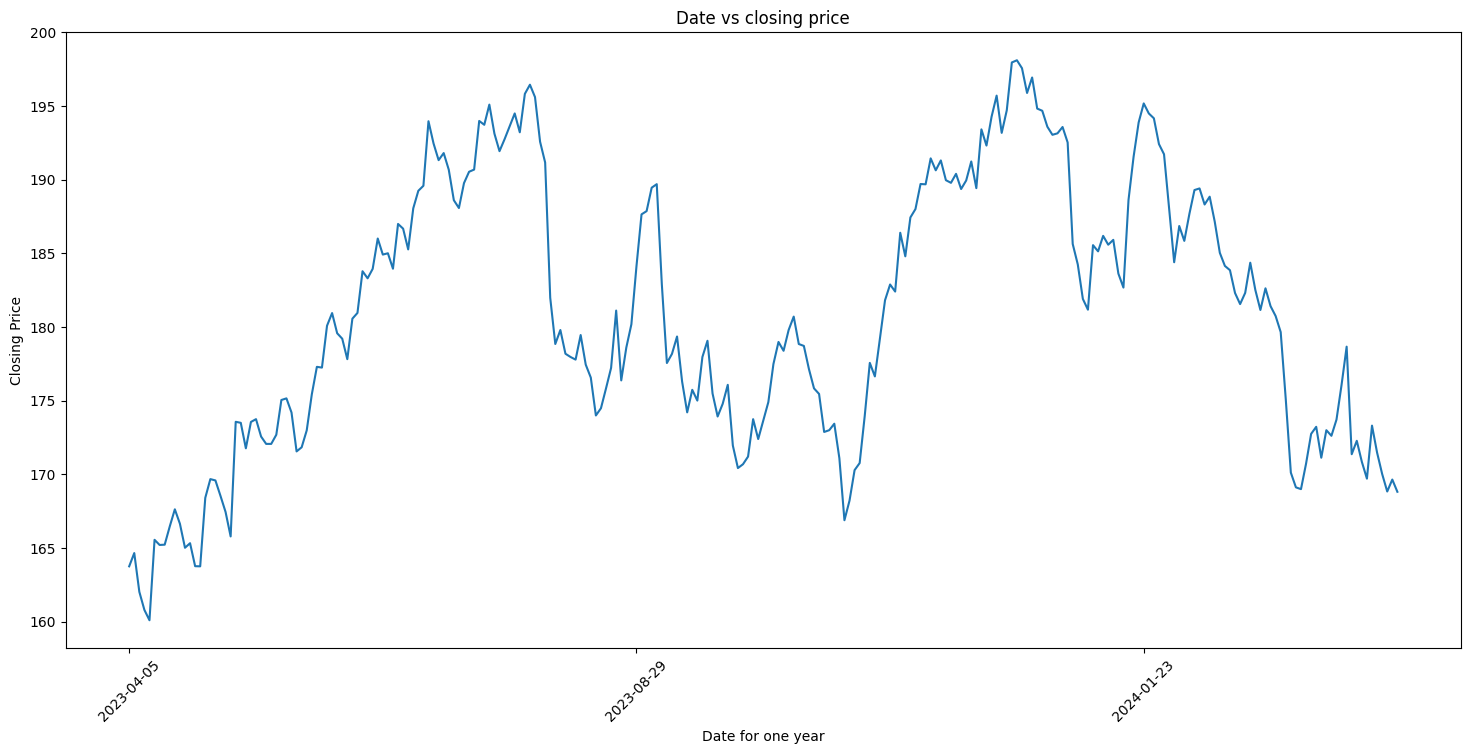

In [ ]:
plt.figure(figsize=(18,8))
plt.plot(df['Date'], df['Close'])
plt.xlabel("Date for one year")
plt.ylabel("Closing Price")
plt.title("Date vs closing price")
plt.xticks(df['Date'][::100], rotation=45)  # Show every 10th date, adjust as nee
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


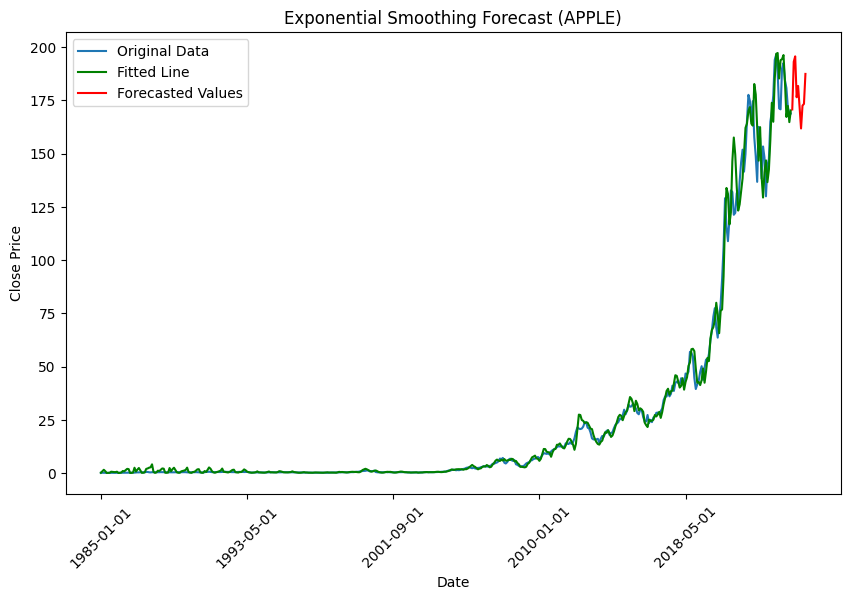

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#APPLE
# Assuming 'data' is your dataset and 'target' is your target variable (if applicable)
model= ExponentialSmoothing(endog=df['Close'],trend='mul',seasonal='mul',seasonal_periods=24)
fit_model = model.fit(smoothing_level=0.5,smoothing_trend=0.3,smoothing_seasonal=0.4)

# Make predictions for the entire time series
predictions = fit_model.fittedvalues

forecast_values = fit_model.forecast(10)
forecast_dates = ['2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30']

# Convert the last date to datetime object
last_date = pd.to_datetime(forecast_dates[-1])

# Generate additional dates until there are 30 elements in the array
while len(forecast_dates) < 10:
    # Add one month to the last date and append it to the list
    last_date += pd.DateOffset(months=1)
    forecast_dates.append(last_date.strftime('%Y-%m-%d'))

# Plot the original data and the fitted line
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Original Data')
plt.plot(df['Date'], predictions, color='green', label='Fitted Line')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecasted Values')
plt.title('Exponential Smoothing Forecast (APPLE)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(df['Date'][::100], rotation=45)
plt.legend()
plt.show()



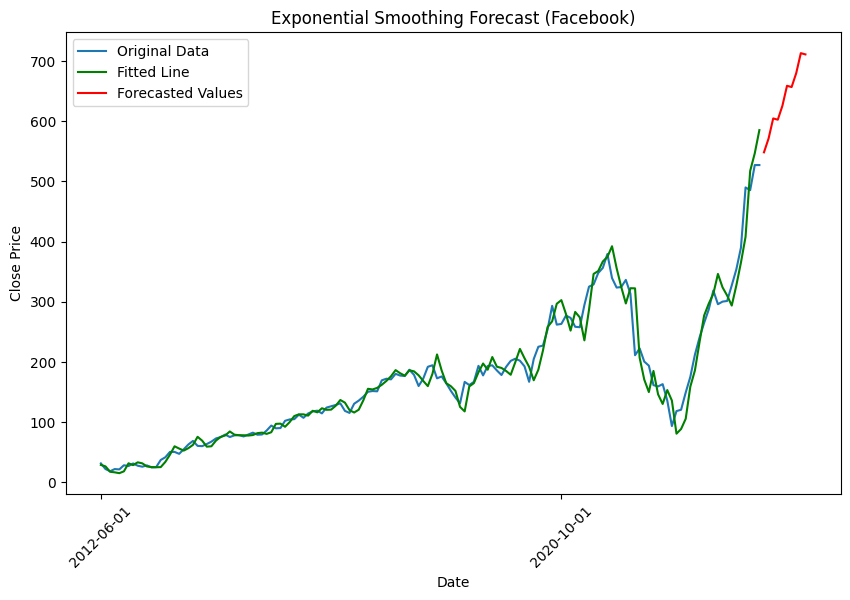

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#FACEBOOK
model= ExponentialSmoothing(endog=df_meta['Close'],trend='add',seasonal='add',seasonal_periods=3)
fit_model = model.fit(smoothing_level=0.6,smoothing_trend=0.6,smoothing_seasonal=0.2)

# Make predictions for the entire time series
predictions = fit_model.fittedvalues

forecast_values = fit_model.forecast(10)
forecast_dates = ['2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30']

# Convert the last date to datetime object
last_date = pd.to_datetime(forecast_dates[-1])

# Generate additional dates until there are 30 elements in the array
while len(forecast_dates) < 10:
    # Add one month to the last date and append it to the list
    last_date += pd.DateOffset(months=1)
    forecast_dates.append(last_date.strftime('%Y-%m-%d'))

# Plot the original data and the fitted line
plt.figure(figsize=(10, 6))
plt.plot(df_meta['Date'], df_meta['Close'], label='Original Data')
plt.plot(df_meta['Date'], predictions, color='green', label='Fitted Line')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecasted Values')
plt.title('Exponential Smoothing Forecast (Facebook)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(df_meta['Date'][::100], rotation=45)
plt.legend()
plt.show()

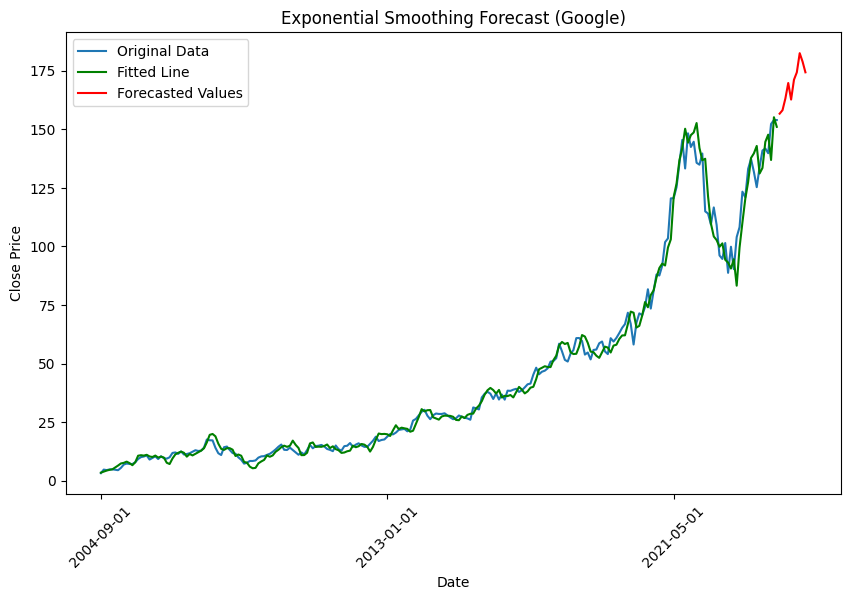

In [ ]:
#GOOGLE
model= ExponentialSmoothing(endog=df_goog['Close'],trend='add',seasonal='add',seasonal_periods=30)
fit_model = model.fit(smoothing_level=0.5,smoothing_trend=0.3,smoothing_seasonal=0.4)

# Make predictions for the entire time series
predictions = fit_model.fittedvalues

forecast_values = fit_model.forecast(10)
forecast_dates = ['2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30']

# Convert the last date to datetime object
last_date = pd.to_datetime(forecast_dates[-1])

# Generate additional dates until there are 30 elements in the array
while len(forecast_dates) < 10:
    # Add one month to the last date and append it to the list
    last_date += pd.DateOffset(months=1)
    forecast_dates.append(last_date.strftime('%Y-%m-%d'))

# Plot the original data and the fitted line
plt.figure(figsize=(10, 6))
plt.plot(df_goog['Date'], df_goog['Close'], label='Original Data')
plt.plot(df_goog['Date'], predictions, color='green', label='Fitted Line')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecasted Values')
plt.title('Exponential Smoothing Forecast (Google)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(df_goog['Date'][::100], rotation=45)
plt.legend()
plt.show()



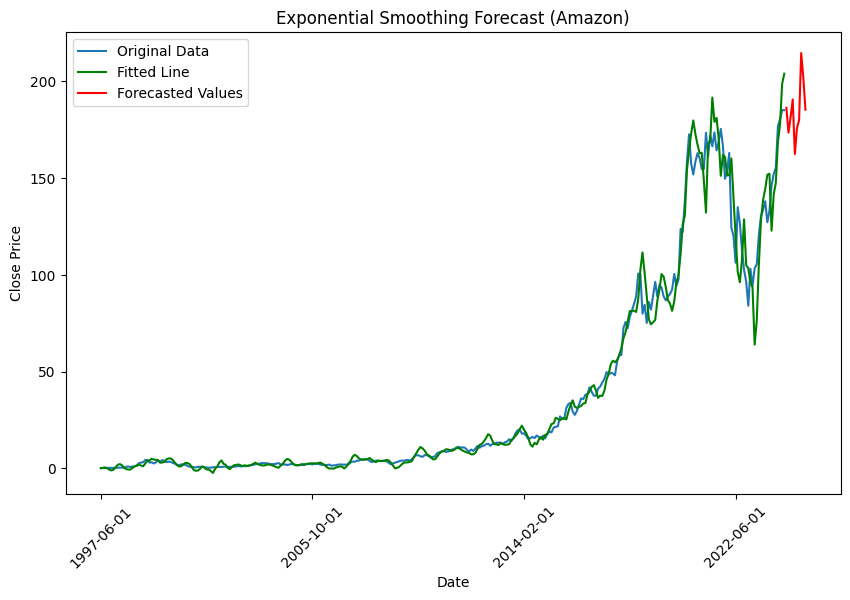

In [ ]:
#AMAZON
model= ExponentialSmoothing(endog=df_amzn['Close'],trend='add',seasonal='add',seasonal_periods=30)
fit_model = model.fit(smoothing_level=0.4,smoothing_trend=0.5,smoothing_seasonal=0.7)

# Make predictions for the entire time series
predictions = fit_model.fittedvalues

forecast_values = fit_model.forecast(10)
forecast_dates = ['2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30']

# Convert the last date to datetime object
last_date = pd.to_datetime(forecast_dates[-1])

# Generate additional dates until there are 30 elements in the array
while len(forecast_dates) < 10:
    # Add one month to the last date and append it to the list
    last_date += pd.DateOffset(months=1)
    forecast_dates.append(last_date.strftime('%Y-%m-%d'))

# Plot the original data and the fitted line
plt.figure(figsize=(10, 6))
plt.plot(df_amzn['Date'], df_amzn['Close'], label='Original Data')
plt.plot(df_amzn['Date'], predictions, color='green', label='Fitted Line')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecasted Values')
plt.title('Exponential Smoothing Forecast (Amazon)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(df_amzn['Date'][::100], rotation=45)
plt.legend()
plt.show()

0        1.036821
1        0.764434
2       -0.115520
3        0.808272
4        3.502177
          ...    
259    529.658762
260    601.531926
261    712.234993
262    601.847262
263    679.486730
Length: 264, dtype: float64


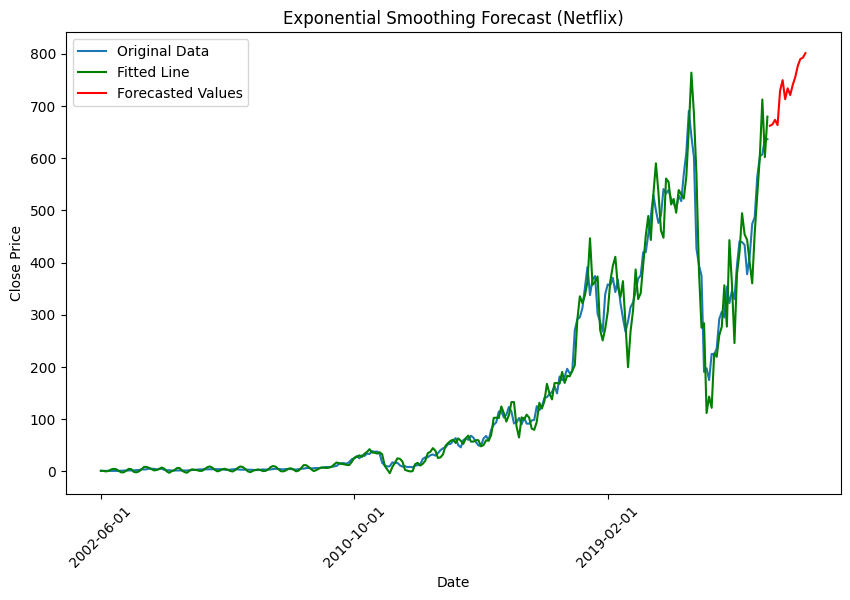

In [ ]:
#NETFLIX
model= ExponentialSmoothing(endog=df_netflix['Close'],trend='add',seasonal='add',seasonal_periods=12)
fit_model = model.fit(smoothing_level=0.7,smoothing_trend=0.6,smoothing_seasonal=0.4)

# Make predictions for the entire time series
predictions = fit_model.fittedvalues
print(predictions)
forecast_values = fit_model.forecast(15)
forecast_dates = ['2024-05-31', '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30']

# Convert the last date to datetime object
last_date = pd.to_datetime(forecast_dates[-1])

# Generate additional dates until there are 30 elements in the array
while len(forecast_dates) < 15:
    # Add one month to the last date and append it to the list
    last_date += pd.DateOffset(months=1)
    forecast_dates.append(last_date.strftime('%Y-%m-%d'))

# Plot the original data and the fitted line
plt.figure(figsize=(10, 6))
plt.plot(df_netflix['Date'], df_netflix['Close'], label='Original Data')
plt.plot(df_netflix['Date'], predictions, color='green', label='Fitted Line')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecasted Values')
plt.title('Exponential Smoothing Forecast (Netflix)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(df_netflix['Date'][::100], rotation=45)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


250    329.929993
251    395.230011
252    440.489990
253    438.970001
254    433.679993
255    377.600006
256    411.690002
257    473.970001
258    486.880005
259    564.109985
260    602.919983
261    607.330017
262    636.179993
263    636.179993
Name: Close, dtype: float64
250    284.883536
251    359.066277
252    384.220334
253    482.797879
254    456.552686
255    489.861365
256    569.865536
257    550.323582
258    533.749566
259    550.410403
260    504.134589
261    580.219008
262    465.239905
263    586.386855
dtype: float64


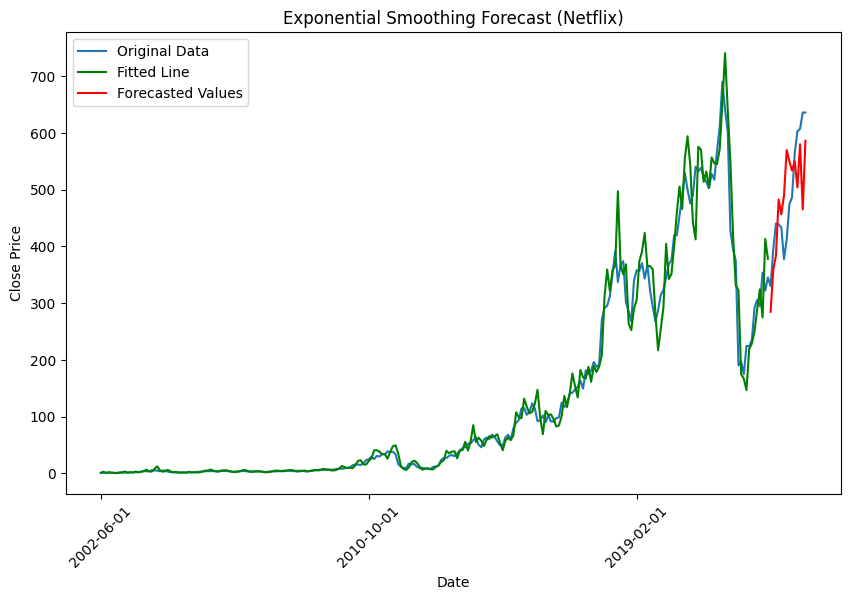

In [ ]:
df_netflix = df_netflix[['Date', 'Close']]

x_train, x_test, y_train, y_test = train_test_split(df_netflix['Date'], df_netflix['Close'], test_size = 0.05, shuffle = False)
model= ExponentialSmoothing(endog = y_train,trend = 'mul',seasonal = 'mul',seasonal_periods = 4)
fit_model = model.fit(smoothing_level=0.4,smoothing_trend=0.5,smoothing_seasonal=0.4)

# Make predictions for the entire time series
predictions = fit_model.fittedvalues

print(y_test)
forecast_values = fit_model.forecast(len(x_test))
forecast_dates = x_test

print(forecast_values)
# Plot the original data and the fitted line
plt.figure(figsize=(10, 6))
plt.plot(df_netflix['Date'], df_netflix['Close'], label='Original Data')
plt.plot(x_train, predictions, color='green', label='Fitted Line')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecasted Values')
plt.title('Exponential Smoothing Forecast (Netflix)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(df_netflix['Date'][::100], rotation=45)
plt.legend()
plt.show()

291    164.251999
292    168.621506
293    175.353500
294    166.716995
295    149.573502
296    153.563004
297    162.997498
298    124.281502
299    120.209503
300    106.209999
301    134.949997
302    126.769997
303    113.000000
304    102.440002
305     96.540001
306     84.000000
307    103.129997
308     94.230003
309    103.290001
310    105.449997
311    120.580002
312    130.360001
313    133.679993
314    138.009995
315    127.120003
316    133.089996
317    146.089996
318    151.940002
319    155.199997
320    176.759995
321    180.380005
322    185.070007
323    185.070007
Name: Close, dtype: float64
291    180.552135
292    180.879545
293    167.569270
294    169.388049
295    166.434130
296    163.574361
297    164.508559
298    167.884838
299    168.446301
300    167.500288
301    169.158744
302    158.809413
303    160.555463
304    181.151550
305    174.302165
306    182.912991
307    193.040614
308    194.084885
309    169.747749
310    163.594337
311    172.506664


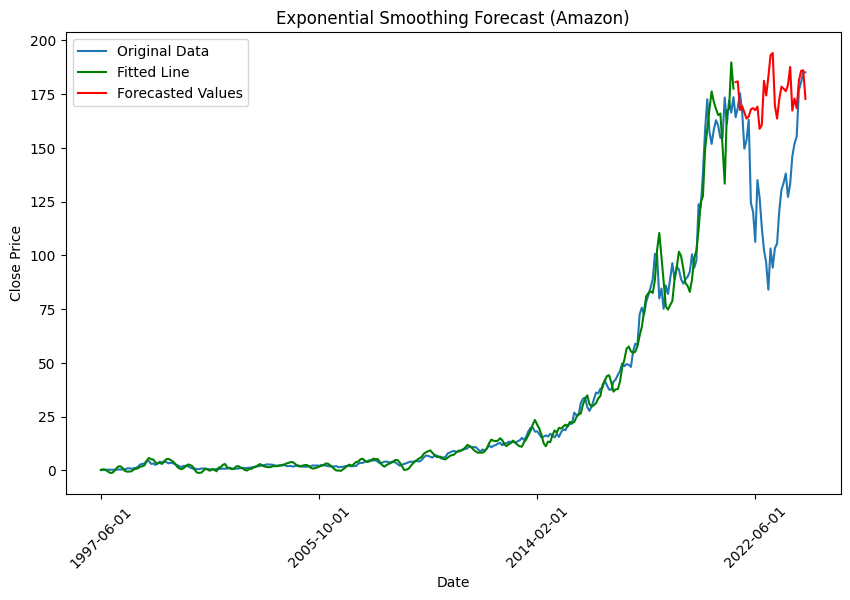

In [ ]:
df_amzn = df_amzn[['Date', 'Close']]

x_train, x_test, y_train, y_test = train_test_split(df_amzn['Date'], df_amzn['Close'], test_size = 0.1, shuffle = False)
model= ExponentialSmoothing(endog = y_train,trend = 'add',seasonal = 'add',seasonal_periods = 30)
fit_model = model.fit(smoothing_level=0.4,smoothing_trend=0.5,smoothing_seasonal=0.7)

# Make predictions for the entire time series
predictions = fit_model.fittedvalues

print(y_test)
forecast_values = fit_model.forecast(len(x_test))
forecast_dates = x_test

print(forecast_values)
# Plot the original data and the fitted line
plt.figure(figsize=(10, 6))
plt.plot(df_amzn['Date'], df_amzn['Close'], label='Original Data')
plt.plot(x_train, predictions, color='green', label='Fitted Line')
plt.plot(forecast_dates, forecast_values, color='red', label='Forecasted Values')
plt.title('Exponential Smoothing Forecast (Amazon)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(df_amzn['Date'][::100], rotation=45)
plt.legend()
plt.show()